In [104]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.stats import norm

In [105]:
def create_dual_gaussian_bumps(T, total_reward, peak_position1, bump_width1, peak_position2, bump_width2):
    scaling_factor1 = total_reward / norm.pdf(peak_position1, loc=peak_position1, scale=bump_width1)
    scaling_factor2 = total_reward / norm.pdf(peak_position2, loc=peak_position2, scale=bump_width2)

    bump1 = scaling_factor1 * norm.pdf(np.arange(T), loc=peak_position1, scale=bump_width1)
    bump2 = scaling_factor2 * norm.pdf(np.arange(T), loc=peak_position2, scale=bump_width2)

    return bump1 + bump2

In [106]:
def plot_1d_subplots(u,r,v, delta_v,delta,n):
    if n == 0:
        tr = 'before training'
    else:
        tr = 'after training'
    fig, axes = plt.subplots(5, 1, figsize=(8, 10))
    plt.suptitle(tr)

    for i, data in enumerate([u,r,v, delta_v,delta]):
        axes[i].plot(data)
        axes[i].set_xlabel('t')
        #axes[i].set_ylabel([r'$\delta$', 'v', 'u', 'r', r'$\Delta$ v'][i])
        axes[i].set_ylabel(['u','r','v',r'$\Delta$ v',r'$\delta$'][i])
        #axes[i].set_ylim(min(data)-0.1, max(data)+0.1)
        axes[i].set_ylim(-1,4.2)
        axes[i].set_xticks(np.arange(0, T, step=100))
        axes[i].set_yticks(np.arange(-1, 4.2, step=1))

    plt.subplots_adjust(hspace=0.5)
    plt.show()



In [107]:
def plot_3d_surface(delta_values, T, trials):
    fig = plt.figure(figsize=(6, 12))
    ax = fig.add_subplot(111, projection='3d')

    time_axis, trials_axis = np.meshgrid(np.arange(T), np.arange(trials))

    ax.plot_surface(time_axis, trials_axis, delta_values, cmap='gray',
                    edgecolor='black', linewidth=0.1)

    ax.set_xlabel('Time')
    ax.set_ylabel('Trials')
    ax.set_zlabel('Delta')

    ax.set_yticks(np.arange(0, trials, step=50))

    plt.tight_layout(rect=[0, 0, 1, 1])
    ax.view_init(30, -60)
    ax.set_zlim(0, 2.2)

    plt.title('A')
    plt.show()

In [108]:
def simulate_and_plot(trials, T):
    delta_values = np.zeros((trials, T))
    weights = np.zeros((trials, T))

    for n in range(trials):
        p = np.random.choice([0, 1])
        if p == 0:
            reward = np.zeros((T))
        else:
            reward = r
        v = np.zeros((T))

        for t in range(T):
            for tau in range(t):
                v[t] = v[t] + (w[tau] * u[t - tau])
        for t in range(T - 1):
            delta_v[t] = v[t + 1] - v[t]
            delta[t] = reward[t] + v[t + 1] - v[t]

        delta_values[n, :] = delta
        
        for t in range(T):
            for tau in range(t):
                w[tau] = w[tau] + e * delta[t] * u[t - tau]
        weights[n, :] = w

        if n == 0 or n == trials - 1:
            #plot_1d_subplots(delta, v, u, r, T,n,delta_v)
            plot_1d_subplots(u,r,v, delta_v,delta,n)

    plot_3d_surface(delta_values, T, trials)
    #plt.plot(weights)

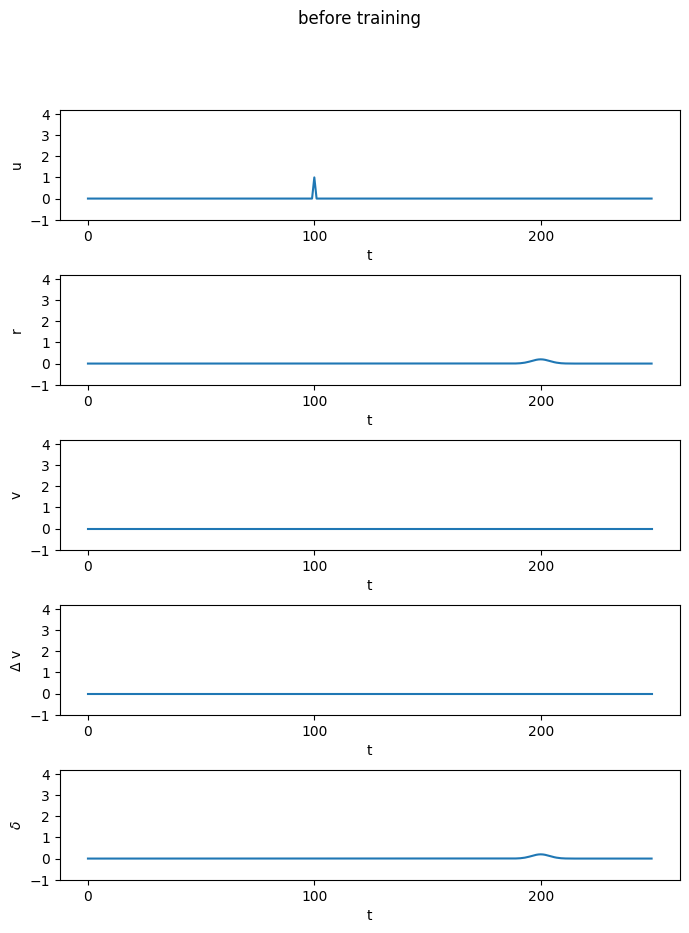

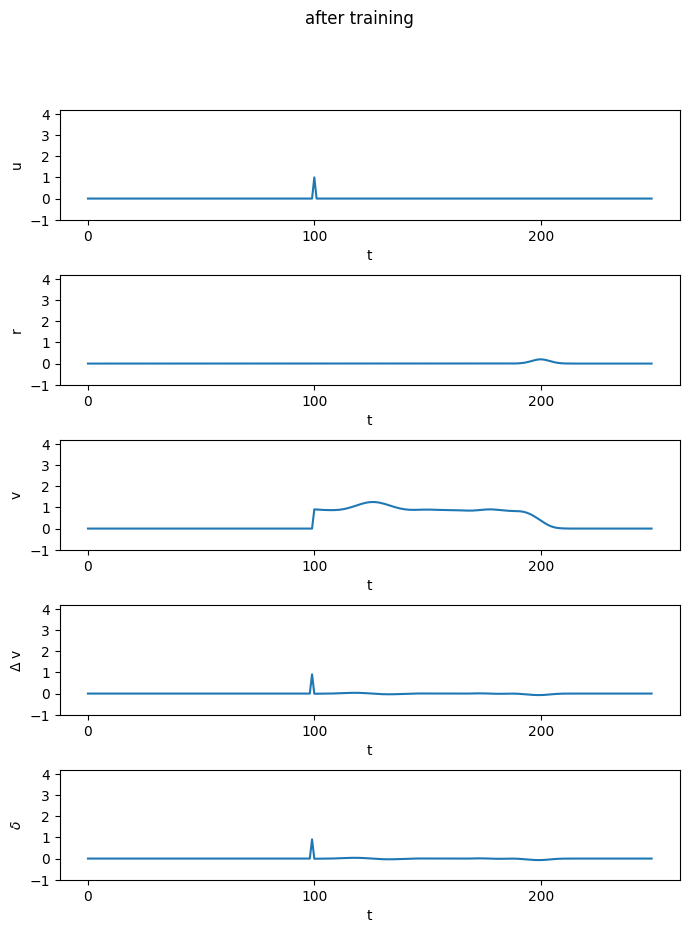

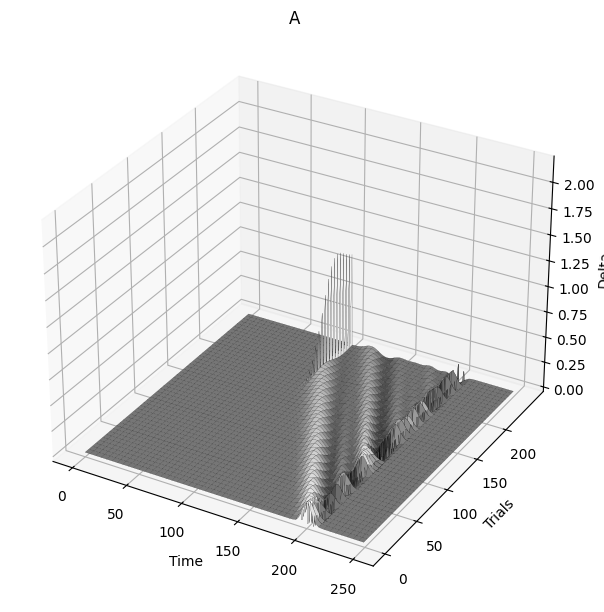

In [109]:
T = 250
delta = np.zeros((T))
delta_v = np.zeros((T))
v = np.zeros((T))
trials = 250
w = np.zeros((T))
r = np.zeros((T))
u = np.zeros((T))

# Set initial conditions
#r[200] = 1
total_reward = 0.2
peak_position = 200
bump_width = 4
scaling_factor = total_reward / norm.pdf(peak_position, loc=peak_position, scale=bump_width)

r = scaling_factor * norm.pdf(np.arange(T), loc=peak_position, scale=bump_width)

u[100] = 1
e = 0.5


T = 250
total_reward = 0.2
peak_position1 = 180
bump_width1 = 4
peak_position2 = 220
bump_width2 = 4
probability=0.5

# Create two Gaussian bumps in the reward signal
#r = create_dual_gaussian_bumps(T, total_reward, peak_position1, bump_width1, peak_position2, bump_width2)


# Run simulation and plot
simulate_and_plot(trials, T)